In [2]:
import nauyaca as nau
import numpy as np

In [3]:

# Let's load the Planetary System object
system = nau.PlanetarySystem.load_json('System-X.json')

# Restarting the mcmc using a new number of iterations and saving at each intra_steps
# We specify that the temperature ladder continue as before
nau.MCMC.restart_mcmc(system, 
                hdf5_file=f'System-X.hdf5', 
                cores=8, 
                itmax=1000, 
                intra_steps=20, 
                restart_ladder=False)

--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06

 =========== RESTARTING MCMC ===========

--> Restarting from file:  ./System-X.hdf5
--> Temperature ladder status:  Temperature ladder continued


 =========== PARALLEL-TEMPERING MCMC ===========

--> Starting date:  2021-04-28 17:56
--> Reference epoch of the solutions:  0  [JD]
--> Results will be saved at:  ./System-X_2.hdf5
--> MCMC parameters:
      -ntemps: 10
      -nwalkers: 50
      -itmax: 1000
      -intra_steps: 20

--------- Iteration:  20
 Mean tau: -0.0
 Accepted swap fraction in Temp 0:  0.036
 Mean acceptance fraction Temp 0:  0.05
 Mean likelihood:  205.245516
 Maximum likelihood:  (0, 31) 212.451913
 Current mean likelihood dispersion:  0.0
 Saving time: 0.00981 sec
 Elapsed time:  0.0775 min
--------- Iteration:  40
 Mean tau: 0.0
 Accepted swap fraction in Temp 0:  0.038
 Mean acceptance fraction Temp 0:  0.045
 M

--------- Iteration:  540
 Mean tau: 0.0
 Accepted swap fraction in Temp 0:  0.043
 Mean acceptance fraction Temp 0:  0.044
 Mean likelihood:  209.310837
 Maximum likelihood:  (0, 10) 215.147298
 Current mean likelihood dispersion:  0.772308
 Saving time: 0.01148 sec
 Elapsed time:  2.0925 min
--------- Iteration:  560
 Mean tau: 0.0
 Accepted swap fraction in Temp 0:  0.044
 Mean acceptance fraction Temp 0:  0.044
 Mean likelihood:  209.494953
 Maximum likelihood:  (0, 23) 215.13747
 Current mean likelihood dispersion:  0.794922
 Saving time: 0.01300 sec
 Elapsed time:  2.1763 min
--------- Iteration:  580
 Mean tau: 0.0
 Accepted swap fraction in Temp 0:  0.044
 Mean acceptance fraction Temp 0:  0.044
 Mean likelihood:  209.56729
 Maximum likelihood:  (0, 34) 215.494993
 Current mean likelihood dispersion:  0.731416
 Saving time: 0.01171 sec
 Elapsed time:  2.2605 min
--------- Iteration:  600
 Mean tau: 0.0
 Accepted swap fraction in Temp 0:  0.045
 Mean acceptance fraction Temp 0: 

In [11]:
print()
print()

In [4]:
results1 = nau.utils.get_mcmc_results('System-X.hdf5', keywords=['CHAINS','NWALKERS'])
chains1 = results1['CHAINS'][0] # Choose the temperature 0
nw = results1['NWALKERS'][0]
print("number of walkers: ", nw)
print("chains1 shape: ", chains1.shape)

number of walkers:  50
chains1 shape:  (50, 100, 13)


In [5]:
results2 = nau.utils.get_mcmc_results('System-X_2.hdf5', keywords=['CHAINS'])
chains2 = results2['CHAINS'][0] # Choose the temperature 0
print("chains2 shape: ",chains2.shape)

chains2 shape:  (50, 50, 13)


In [6]:
chains = np.concatenate([chains1, chains2], axis=1)
print("chains norm shape: ",chains.shape)

chains norm shape:  (50, 150, 13)


In [37]:
# The results from the mcmc are the normalized between 0 and 1, which 
# correspond to the established boundaries. In order to get the physical 
# values it is necessary to convert them back

In [13]:
chains_phys = np.array([list(nau.utils.cube_to_physical(system, x) for x in chains[w,:,:]) for w in range(nw) ])

In [14]:
# It will return the physical chains
print("chains physical shape: ", chains_phys.shape)

chains physical shape:  (50, 150, 14)


In [15]:
# Note that the shape of the physical chains have an extra dimension. 
# It is because nau.utils.cube_to_physical insert the constant parameters
# stored in system.constant_params
print("Constant parameters inserted: ", system.constant_params)
# which corresponds to the index and the value

Constant parameters inserted:  OrderedDict([(6, 179.99)])


In [16]:
# If you need the physical values without the constant parameters,
# you can remove them with the function _remove_constants in utils
chains_phys = np.array([[nau.utils._remove_constants(system, x) for x in chains_phys[w,:,:]] for w in range(nw) ])
print("chains physical shape (no constants): ", chains_phys.shape)

chains physical shape (no constants):  (50, 150, 13)


In [17]:
# Now, do whatever operation with these chains. Remember that the dimensions are
system.params_names

'mass1  period1  ecc1  inclination1  argument1  mean_anomaly1  mass2  period2  ecc2  inclination2  argument2  mean_anomaly2  ascending_node2'

In [19]:
# Results for mass of planet 1
mass1 = np.mean(chains_phys[:,:,0].flatten())
mass_std = np.std(chains_phys[:,:,0].flatten())
print(f"Mass 1: {mass1} +/- {mass_std}")

Mass 1: 10.01831525199345 +/- 0.6416617877818983


_____________________

In [1]:
import nauyaca as nau
import numpy as np
import matplotlib.pyplot as plt

In [25]:

# Let's load the Planetary System object
mysystem = nau.PlanetarySystem.load_json('System-X.json')
print(mysystem)

--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06

 =========== Planetary System Summary =========== 
--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06

System: System-X
Mstar: 0.91 Msun |  Rstar: 1.18 Rsun
Number of planets: 2
Planet information:
------
Planet1: Planet-b
  Boundaries:
    mass: (1, 100)  [M_earth]
    period: (33.61, 33.62)  [d]
    ecc: (1e-06, 0.3)   
    inclination: (85, 95)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (179.99, 179.99)  [deg]
  TTVs: True
------
Planet2: Planet-c
  Boundaries:
    mass: (1, 100)  [M_earth]
    period: (73.5, 73.51)  [d]
    ecc: (1e-06, 0.3)   
    inclination: (85, 95)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (90, 270)  [deg]
 

In [26]:
opt = np.genfromtxt('System-X.opt')


OSError: System-X.opt not found.

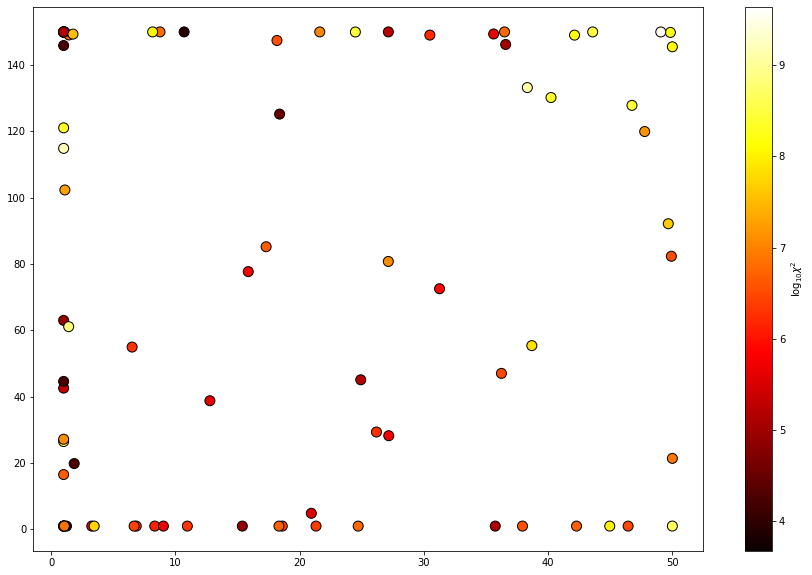

In [12]:
x, y = 'mass2', 'mass3'
dparam = dict(list(zip(mysystem.params_names.split(), range(mysystem.ndim))))

chi2 = opt.T[0]
phys = opt[:,1:].T

cx = phys[dparam[x]]
cy = phys[dparam[y]]

plt.figure(figsize=(15,10))

# Plot all the solutions from the optimizers
plt.scatter(cx, cy, 
        c=np.log10(chi2), 
            cmap='hot', s=100,
            edgecolors='k',
        label='Results from optimizers')
cb = plt.colorbar()
cb.set_label(r'$\log_{10} \chi^2$')


In [ ]:
# Now, let's use many of the functions in the utils module.

# Mid-transit times are simulated from a given initial conditions
# Then, these transits are compared with the observations. 
# Let's calculate the chi square statistic of random solutions.


In [27]:
# Let's read the mcmc chains from a previous run
results = nau.utils.get_mcmc_results('./System-X.hdf5', keywords=['CHAINS'])
chains = results['CHAINS'][0]
nw, steps, _ = chains.shape

In [28]:
# Now, we select a random solution
rdm_wk = np.random.randint(0,nw)
rdm_st = np.random.randint(.8*steps,steps)
print(f"Random solutions|  walker:{rdm_wk}  step:{rdm_st}")

Random solutions|  walker:29  step:91


In [29]:
# There are two ways of calculating the chi square:
# 1.- From the normalized solution
# 2.- From the physical solution 

In [30]:
# 1.- 

# Extract that random solution
x_cube = chains[rdm_wk, rdm_st, :]
print("Normalized solution:\n", x_cube)

Normalized solution:
 [0.0890076  0.81122107 0.46917364 0.60177398 0.78470411 0.62218694
 0.18382261 0.92361424 0.04613802 0.52335149 0.62610523 0.07569874
 0.36712031]


In [31]:
# Let's pass the proposal and the Planetary System object
chi2 = nau.utils.calculate_chi2(x_cube, mysystem)
print(chi2)

134.36214306192235


In [32]:
# 2.-

# Convert the normalized solution to physical values
x_phys = nau.utils.cube_to_physical(mysystem, x_cube)
print(x_phys)

[9.81175262e+00 3.36181122e+01 1.40752624e-01 9.10177398e+01
 3.26480778e+02 2.38506183e+02 1.79990000e+02 1.91984388e+01
 7.35092361e+01 1.38423598e-02 9.02335149e+01 7.26494279e+01
 1.81463343e+01 1.56081657e+02]


In [33]:
# An easy way to know what that solution means:
dict(zip(mysystem.params_names_all.split(), x_phys))

{'mass1': 9.811752624259658,
 'period1': 33.618112210684124,
 'ecc1': 0.14075262355071178,
 'inclination1': 91.0177398348025,
 'argument1': 326.48077764626487,
 'mean_anomaly1': 238.50618349162954,
 'ascending_node1': 179.99,
 'mass2': 19.19843884687079,
 'period2': 73.50923614244303,
 'ecc2': 0.01384235975913711,
 'inclination2': 90.23351489321861,
 'argument2': 72.64942793811903,
 'mean_anomaly2': 18.146334326903798,
 'ascending_node2': 156.08165659275883}

In [34]:
# Now, we use the function calculate_chi2_physical
chi2 = nau.utils.calculate_chi2_physical(x_phys, mysystem)
print(chi2)

134.36214306192235


In [35]:
# There are many other functionalities in calculate_chi2_physical
# For example, we can get the individual chi2 ṕer planet
chi2 = nau.utils.calculate_chi2_physical(x_phys, mysystem, individual=True)
print(chi2)
# which  returns a dictionary with the individual chi squares per planet in the system

{'Planet-b': 94.55629062851118, 'Planet-c': 39.80585243341118}


In [36]:
# We can also get the simulated ephemeris of these planets
chi2, ephe = nau.utils.calculate_chi2_physical(x_phys, mysystem, get_ephemeris=True)
print("chi2:", chi2)
print("Simulated ephemeris:\n",ephe)

chi2: 134.36214306192235
Simulated ephemeris:
 {'Planet-b': {0: 21.551597124607497, 1: 55.17139063600678, 2: 88.79342842201437, 3: 122.41788688571519, 4: 156.0422005975135, 5: 189.6699147900399, 6: 223.29591026074638, 7: 256.923103278708, 8: 290.54935815275775, 9: 324.169546311197, 10: 357.78942522933295, 11: 391.4083932566132, 12: 425.0272270652485, 13: 458.6483378703758, 14: 492.2711577711872, 15: 525.8949341203893, 16: 559.5218271666602, 17: 593.1472781723877, 18: 626.7759615288923, 19: 660.4031882969119, 20: 694.0252262077029, 21: 727.6469763926249, 22: 761.2656436023863, 23: 794.8839325127633, 24: 828.5038345809081, 25: 862.1246205488914, 26: 895.7473004800153, 27: 929.3727472176972, 28: 962.9974215117526, 29: 996.6256328454709}, 'Planet-c': {0: 73.2491564481656, 1: 146.74940417724974, 2: 220.24126506212446, 3: 293.7311583716907, 4: 367.2339349699329, 5: 440.74170397446915, 6: 514.2448240096629, 7: 587.7394332587135, 8: 661.2275402985698, 9: 734.7263312811807, 10: 808.233777957998

In [37]:
# It returns a tuple with the chi2 and a dictionary with the simulated ephemeris per
# planet, where keys are the transit epoch number and values are the mid-trantis times

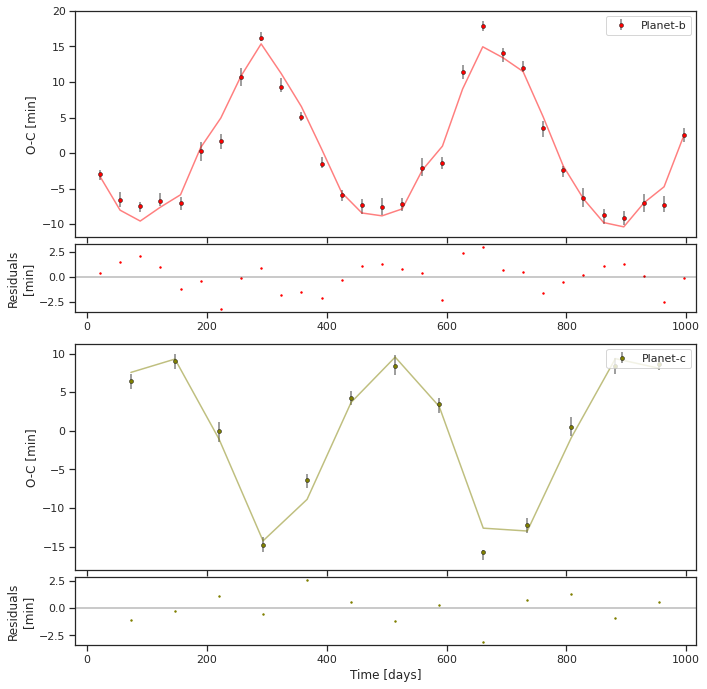

In [38]:
# Want to know how that solution looks like?
# Use the Plots module in nauyaca

naup = nau.Plots(mysystem)

# Remove the constant parameters. They will be automatically
# added in TTVs plot function
x_phys_2 = nau.utils._remove_constants(mysystem, x_phys)

naup.TTVs(flat_params=x_phys_2 )
